In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data into DataFrames
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

print("number of users", train_users.shape[0], "user in the testset", 
      test_users.shape[0])
print("In total", train_users.shape[0] + test_users.shape[0], "users.")

('number of users', 213451, 'user in the testset', 62096)
('In total', 275547, 'users.')


# Merge train and test users

In [194]:

users = pd.concat((train_users, test_users), axis=0, ignore_index=True)
#drop the id column
#users.drop('id',axis=1, inplace=True)

users.head()



,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


# CLeaning data :

fixing up format/filling in missing values/correcting erroneous values/standardizing categorical values

In [195]:
#fixing format date
users['date_account_created'] = pd.to_datetime(users['date_account_created'], format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')
users['date_account_created'].fillna(users.timestamp_first_active, inplace=True)

# Filling missing values

In [196]:
#spot mssing values
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0].drop('country_destination')


age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
dtype: float64

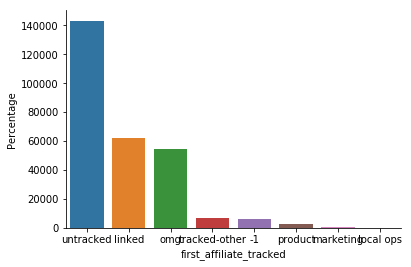

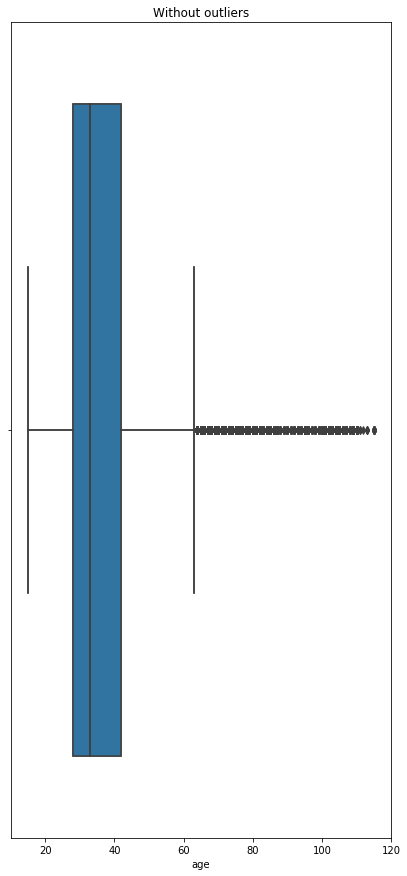

In [197]:
#Age
#users[users.age > 100]['age'].describe()
#users[users.age >14]['age'].describe()
#print(users.loc[users['age'] > 100, 'age'] )
#print(users.loc[users['age'] < 13, 'age'] )

#fill the value >100 with nan for age
users['age'] = users['age'].apply(lambda x: np.nan if x > 120 else x)
users['age'] = users['age'].apply(lambda x: np.nan if x < 13 else x)


#boxplot
PClass_palette = {1:"b", 2:"y", 3:"r"}
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
sns.boxplot(x=users['age'],showfliers=True)
plt.title('With outliers')

plt.subplot(1,2,1)
sns.boxplot( x=users['age'],showfliers=False)
plt.title('Without outliers')

plt.show()


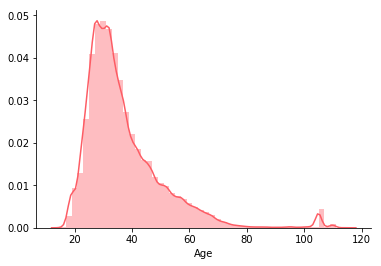

In [198]:
sns.distplot(users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
plt.show()

In [199]:
#recognize NaN value
users['age'].fillna(-1, inplace=True)
df = users["age"]
df.isnull().sum()

0

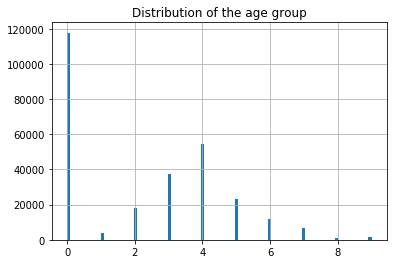

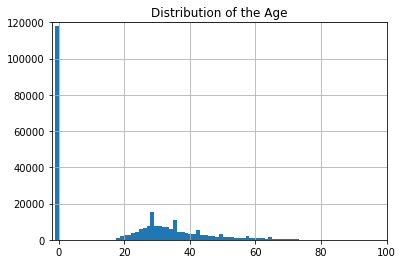

In [200]:
bins = [-1, 20, 25, 30, 40, 50, 60, 75, 100]
users['age_group'] = np.digitize(users['age'], bins, right=True)

users.age_group.hist(bins=100)
plt.title('Distribution of the age group')

plt.show()



users['age'].hist(bins=100)
plt.axis([-2,100,0,120000])
plt.title('Distribution of the Age')
plt.show()


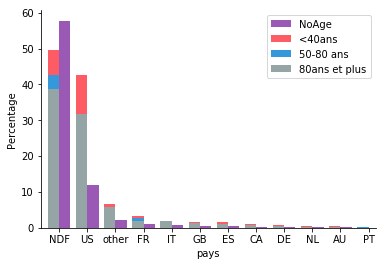

In [201]:
sumAge1 = sum(users['age'] == -1)
sumAge2 = sum((users['age'] > -1) & (users['age'] <= 40))
sumAge3 = sum((users['age'] > 40) & (users['age'] <= 80))
sumAge4 = sum(users['age'] > 80)

age1_destinations = users.loc[users['age'] == -1, 'country_destination'].value_counts() / sumAge1 * 100
age2_destinations = users.loc[(users['age'] > -1) & (users['age_group'] <= 40), 'country_destination'].value_counts() / sumAge2 * 100
age3_destinations = users.loc[(users['age'] > 40) & (users['age_group'] <= 80),'country_destination'].value_counts() / sumAge3 * 100
age4_destinations = users.loc[users['age'] > 80,'country_destination'].value_counts() / sumAge4 * 100
# Bar width
width = 0.4

age1_destinations.plot(kind='bar', width=width,position=0,label='NoAge', color='#9b59b6',rot=0)
age2_destinations.plot(kind='bar', width=width,  position=1, label='<40ans',color='#FD5C64', rot=0)
age3_destinations.plot(kind='bar', width=width,  position=1, label='50-80 ans',color='#3498db', rot=0)
age4_destinations.plot(kind='bar', width=width,  position=1, label='80ans et plus',color='#95a5a6', rot=0)

plt.legend()
plt.xlabel('pays')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [202]:
#first_affiliate_tracked

sns.countplot(x="first_affiliate_tracked", data=users, order=list(users.first_affiliate_tracked.value_counts().keys()))
plt.xlabel('first_affiliate_tracked')
plt.ylabel('Percentage')
sns.despine()
# Fill first_affiliate_tracked column
users.first_affiliate_tracked.fillna('untracked', inplace = True)

#drop user first booking date (Test does not have one)
users.drop('date_first_booking', axis=1, inplace=True)

Gender

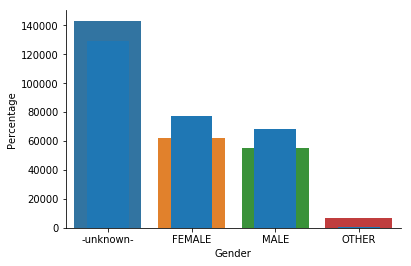

In [203]:
import matplotlib.pyplot as plt 
import seaborn as sns

users.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
sns.despine()


plt.show()

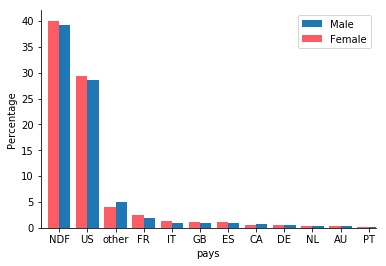

In [204]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width,position=0,label='Male', rot=0)
female_destinations.plot(kind='bar', width=width,  position=1, label='Female',color='#FD5C64', rot=0)

plt.legend()
plt.xlabel('pays')
plt.ylabel('Percentage')

sns.despine()
plt.show()

In [205]:
#at first sigth no difference of destination for gender

user_dest = users.country_destination.drop_duplicates()
print(user_dest)


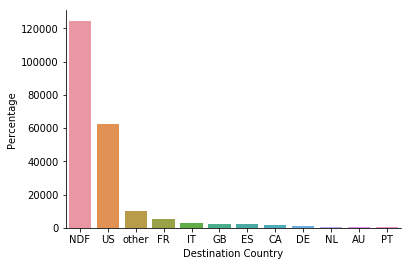

In [206]:
sns.countplot(x="country_destination", data=users, order=list(users.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

Hypothesis Testing

- H0: There is no relationship between country preference and the sex of the customer.
- H1: There is a relationship between country preference and the sex of the customer.
significance level alpha = 0.05

In [207]:
observed = users.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


In [208]:
#date ==>  split the date into day week month and year
date_account_created = pd.DatetimeIndex(users['date_account_created'])
date_first_active = pd.DatetimeIndex(users['timestamp_first_active'])

users['day_account_created'] = date_account_created.day
users['weekday_account_created'] = date_account_created.weekday
users['week_account_created'] = date_account_created.week
users['month_account_created'] = date_account_created.month
users['year_account_created'] = date_account_created.year
users['day_first_active'] = date_first_active.day
users['weekday_first_active'] = date_first_active.weekday
users['week_first_active'] = date_first_active.week
users['month_first_active'] = date_first_active.month
users['year_first_active'] = date_first_active.year


In [209]:
print date_first_active.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name=u'timestamp_first_active', length=275547)


In [210]:
users['time_lag'] = (date_account_created.values - date_first_active.values).astype(int)
users.head(10)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,...,weekday_account_created,week_account_created,month_account_created,year_account_created,day_first_active,weekday_first_active,week_first_active,month_first_active,year_first_active,time_lag
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,...,0,26,6,2010,19,3,12,3,2009,-406906368
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,...,2,21,5,2011,23,5,21,5,2009,-1680882176
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,...,1,39,9,2010,9,1,24,6,2009,965372416
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,...,0,49,12,2011,31,5,44,10,2009,1542391296
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,...,1,37,9,2010,8,1,50,12,2009,-184711680
5,other,other,-1.0,US,2010-01-01,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,...,4,53,1,2010,1,4,53,1,2010,1153606144
6,other,craigslist,46.0,US,2010-01-02,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,...,5,53,1,2010,2,5,53,1,2010,255722496
7,direct,direct,47.0,US,2010-01-03,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,...,6,53,1,2010,3,6,53,1,2010,-889543168
8,other,craigslist,50.0,US,2010-01-04,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,...,0,1,1,2010,4,0,1,1,2010,-1264262656
9,other,craigslist,46.0,US,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,...,0,1,1,2010,4,0,1,1,2010,992822272


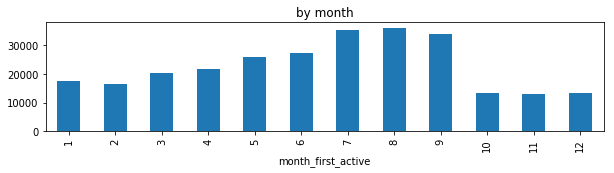

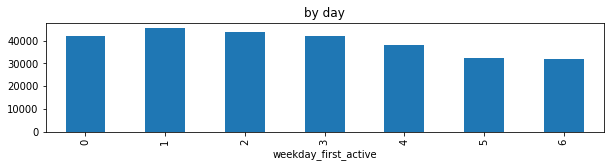

In [211]:
# What is the influence date of booking on the destination
#by month
users.groupby(['month_first_active'])['timestamp_first_active'].count().plot(kind='bar',figsize=(10,2),title='by month')
plt.show()
#

#by day of the week
users.groupby(['weekday_first_active'])['timestamp_first_active'].count().plot(kind='bar',figsize=(10,2),title='by day')
plt.show()
#tuesday th new user is active on his session

In [212]:
data_gender = users[(users['country_destination'] != 'NDF') & (users['country_destination'] != 'unknown') & (users['gender'] != 'OTHER') & (users['gender'].dropna())]
data_gender = data_gender[['id', 'gender', 'country_destination']]
data_gender.head()


,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
3,bjjt8pjhuk,FEMALE,other
4,87mebub9p4,-unknown-,US
5,osr2jwljor,-unknown-,US
6,lsw9q7uk0j,FEMALE,US


In [213]:
observed = data_gender.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
gender,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,278,69,19457,3443


In [214]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [215]:
chi2
p

5.5911285622739441e-49

In [216]:
#P value is higher than 5% so we can reject the null hypothesis. There is a correlation between destinationand gender.

In [219]:
users['nans'] = np.sum([
    (users['age'] == -1),
    (users['gender'] == '-unknown-'),
    (users['language'] == '-unknown-'),
    (users['first_affiliate_tracked'] == 'untracked'),
    (users['first_browser'] == '-unknown-')
], axis=0)

users['nans'].head(10)

0    3
1    1
2    1
3    1
4    2
5    2
6    1
7    0
8    1
9    1
Name: nans, dtype: int32

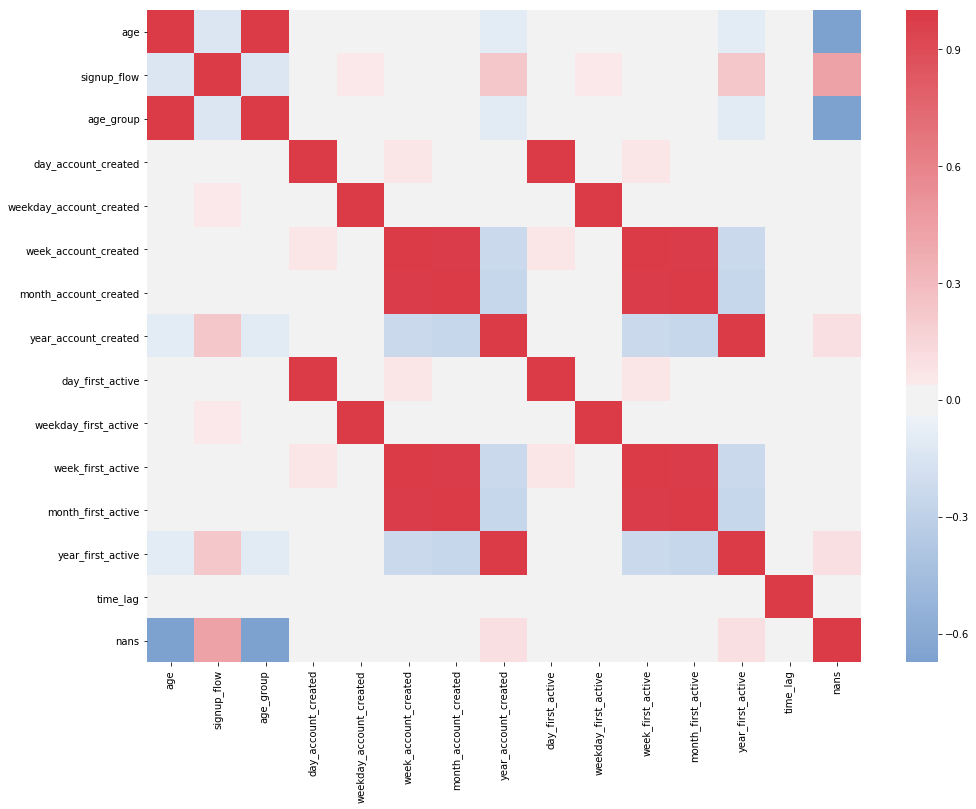

Index([u'age', u'age_group'], dtype='object')


In [218]:
# Matrice de correlation et selection des features les plus utiles
cor_matrix = users.corr().round(5)
fig = plt.figure(figsize=(16,12));

sns.heatmap(cor_matrix, annot=False, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

correlated_features = cor_matrix.index[cor_matrix.age.abs()>.15][:-1]
print(correlated_features)